In [ ]:
# https://www.kaggle.com/roshansharma/market-basket-analysis

# 가지고 있는 hyperparameter

>- state i에서 state j로의 전이가능한 것의 개수(일단 13개)
>- state i에서 state j로의 전이확률이 낮은 것(여기선 0.05, 5%)
>- 알파베타 구할 때 감마값

In [2]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
# import squarify
import seaborn as sns
from PIL import Image
plt.style.use('fivethirtyeight')

# for market basket analysis
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

In [4]:
# reading the dataset

number_of_sample = 100
data = pd.read_csv('../market_basket', encoding = "EUC-KR")

# let's check the shape of the dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,고춧가루,설탕,홍고추,쌀,맛술,매실,들깨가루,미림,참깨,대파,깨,게맛살,NaN,NaN
1,동태,식용유,맛간장,멸치,당면,크래미,깨,식초,물,간장,NaN,NaN,NaN,NaN
2,간장,참기름,물,들기름,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,새우,물,표고버섯,올리고당,알배추,대파,다진마늘,마늘,숙주,청양고추,고추장,김가루,NaN,NaN
4,소고기우둔살,차돌박이,물,진간장,배추김치,게맛살,다진마늘,두부,청양고추,고추장,김가루,NaN,NaN,NaN


# mdp를 위한 dataset으로 변경

> ## Skipping을 포함한 counting 함수 만들기

In [5]:
def skipping(k, basket:list):
    global cnt
    for i in range(k):
        lst3 = [-1] * (k-i) + basket[:i+1]
        lst4 = []
        for value in lst3:
            if value != -1:
                lst4.append(item2idx[value])
            else:
                lst4.append(value)
        
        if tuple(lst4) not in list2state:
            list2state[tuple(lst4)] = cnt
            cnt += 1
        
        # lst4에 대한 adjacency list 만들기
        a = lst4[1:]
        for j in range(i+1, len(basket)):
            b = a + [item2idx[basket[j]]]
            if tuple(b) not in list2state:
                list2state[tuple(b)] = cnt
                cnt += 1
                if tuple(b) not in adjlist[tuple(lst4)]:
                    if (j-(i+1)) <= 10:
                        adjlist[tuple(lst4)][tuple(b)] = round((1/2)**(j-(i+1)), 3)
                else:
                    if (j-(i+1)) <= 10:
                        adjlist[tuple(lst4)][tuple(b)] += round((1/2)**(j-(i+1)), 3)
            
            else:
                if (j-(i+1)) <= 10:
                    if tuple(b) not in adjlist[tuple(lst4)]:
                        adjlist[tuple(lst4)][tuple(b)] = round((1/2)**(j-(i+1)), 3)
                    else:
                        adjlist[tuple(lst4)][tuple(b)] += round((1/2)**(j-(i+1)), 3)
                        
    for i in range(len(basket)-(k+1)):
        lst2 = []
        lst2.append(item2idx[basket[i]])
        for j in range(i+1, i+k+1):
            lst2.append(item2idx[basket[j]])
        if tuple(lst2) not in list2state:
            list2state[tuple(lst2)] = cnt
            cnt += 1
            
        # lst2에 대한 adjacency list 만들기
        a = lst2[1:]
        for j in range(i+k+1, len(basket)):
            b = a + [item2idx[basket[j]]]
            if tuple(b) not in list2state:
                list2state[tuple(b)] = cnt
                cnt += 1
                if tuple(b) not in adjlist[tuple(lst2)]:
                    if (j-(i+k+1)) <= 10:
                        adjlist[tuple(lst2)][tuple(b)] = round((1/2)**(j-(i+k+1)), 3)
                else:
                    if (j-(i+k+1)) <= 10:
                        adjlist[tuple(lst2)][tuple(b)] += round((1/2)**(j-(i+k+1)), 3)
            else:
                if (j-(i+k+1)) <= 10:
                    if tuple(b) not in adjlist[tuple(lst2)]:
                        adjlist[tuple(lst2)][tuple(b)] = round((1/2)**(j-(i+1)), 3)
                    else:
                        adjlist[tuple(lst2)][tuple(b)] += round((1/2)**(j-(i+1)), 3)

In [82]:
from collections import defaultdict

lll = set()
list2state = defaultdict(int)
adjlist = defaultdict(dict)
cnt = 0

for i in range(100):
    basket = data.loc[i,:][data.loc[i,:].isnull() == False].tolist()
    for val in basket:
        lll.add(val.strip())
    
item2idx = {j:i for i,j in enumerate(lll)}
idx2item = {i:j for i,j in enumerate(lll)}

def ttt(N):
    for i in range(len(data)):
        basket = list(map(lambda x: x.strip(), data.loc[i,:][data.loc[i,:].isnull() == False].tolist()))
        skipping(N, basket)
  
    return list2state, adjlist

state, tr_old = ttt(2)

In [319]:
# state i에서 j로의 이동이 많지않은 state i는 제거함.
# 여기선 13 안되면 쳐냈음

print(len(tr_old))

lll = tr_old.copy()

for i in tr_old:
    if len(tr_old[i]) < 30:
        del(lll[i])
    
print(len(lll))

44036
363


# tr_predict 구하기

In [320]:
tr_predict = defaultdict(dict)

def tr_pre_fcn(dic):
    a = np.array(list(dic.values()))
    val = a / a.sum()
    cnt = 0
    for i in dic:
        dic[i] = round(val[cnt], 3)
        cnt+=1

    return dic

for i in lll:
    tr_predict[i] = tr_pre_fcn(lll[i])
    
tr_predict

defaultdict(dict,
            {(-1, -1, 113): {(-1, 113, 303): 0.028,
              (-1, 113, 210): 0.015,
              (-1, 113, 63): 0.019,
              (-1, 113, 190): 0.01,
              (-1, 113, 6): 0.001,
              (-1, 113, 171): 0.002,
              (-1, 113, 287): 0.006,
              (-1, 113, 72): 0.018,
              (-1, 113, 253): 0.037,
              (-1, 113, 145): 0.007,
              (-1, 113, 114): 0.002,
              (-1, 113, 187): 0.062,
              (-1, 113, 162): 0.006,
              (-1, 113, 31): 0.022,
              (-1, 113, 340): 0.007,
              (-1, 113, 224): 0.003,
              (-1, 113, 235): 0.0,
              (-1, 113, 262): 0.033,
              (-1, 113, 364): 0.005,
              (-1, 113, 22): 0.01,
              (-1, 113, 33): 0.015,
              (-1, 113, 226): 0.048,
              (-1, 113, 346): 0.003,
              (-1, 113, 52): 0.021,
              (-1, 113, 43): 0.032,
              (-1, 113, 100): 0.005,
              (-1,

### tr_predict의 값이 작은 state를 삭제

In [321]:
# 임계점을 5%로 둠.

for i in tr_predict:
    ll = tr_predict[i].copy()
    for j in tr_predict[i]:
        if tr_predict[i][j] < 0.05:
            del(ll[j])
            
    tr_predict[i] = ll

# 확률전이값으로 변경    

for i in tr_predict:
    tr_predict[i] = tr_pre_fcn(tr_predict[i])
    
tr_predict

defaultdict(dict,
            {(-1, -1, 113): {(-1, 113, 187): 1.0},
             (-1, 113, 303): {(113, 303, 210): 0.079,
              (113, 303, 253): 0.083,
              (113, 303, 87): 0.079,
              (113, 303, 262): 0.08,
              (113, 303, 183): 0.079,
              (113, 303, 98): 0.097,
              (113, 303, 187): 0.112,
              (113, 303, 204): 0.079,
              (113, 303, 48): 0.079,
              (113, 303, 272): 0.079,
              (113, 303, 241): 0.079,
              (113, 303, 100): 0.079},
             (-1, -1, 96): {(-1, 96, 149): 0.147,
              (-1, 96, 98): 0.119,
              (-1, 96, 218): 0.147,
              (-1, 96, 48): 0.147,
              (-1, 96, 287): 0.147,
              (-1, 96, 375): 0.147,
              (-1, 96, 253): 0.147},
             (-1, -1, 98): {(-1, 98, 187): 1.0},
             (-1, 98, 279): {(98, 279, 226): 0.596,
              (98, 279, 69): 0.244,
              (98, 279, 43): 0.16},
             (-1, -1, 10

In [322]:
state = set(tr_predict.keys())

for i in tqdm(list(tr_predict.keys())):
    state = state | set(tr_predict[i].keys())

state

{(-1, 189, 7),
 (-1, 32, 187),
 (132, 253, 263),
 (-1, 52, 187),
 (-1, 219, 43),
 (-1, 293, 364),
 (-1, -1, 26),
 (31, 187, 26),
 (-1, 262, 303),
 (-1, 228, 31),
 (364, 187, 190),
 (-1, 110, 253),
 (98, 226, 22),
 (113, 303, 272),
 (-1, 357, 396),
 (-1, -1, 212),
 (-1, 44, 303),
 (279, 262, 291),
 (-1, 224, 226),
 (279, 303, 263),
 (396, 113, 216),
 (-1, 55, 52),
 (-1, -1, 358),
 (-1, 360, 253),
 (43, 303, 63),
 (113, 378, 253),
 (279, 303, 213),
 (226, 272, 63),
 (-1, 316, 125),
 (396, 113, 303),
 (-1, -1, 49),
 (-1, 113, 253),
 (-1, -1, 304),
 (226, 138, 31),
 (378, 253, 60),
 (98, 253, 244),
 (31, 262, 43),
 (113, 253, 187),
 (-1, 245, 330),
 (-1, 106, 187),
 (-1, 322, 303),
 (-1, 187, 31),
 (279, 113, 52),
 (262, 272, 303),
 (149, 272, 66),
 (-1, 52, 262),
 (-1, -1, 157),
 (187, 263, 226),
 (-1, 326, 263),
 (364, 43, 98),
 (263, 63, 113),
 (-1, 98, 113),
 (-1, 208, 340),
 (187, 98, 262),
 (-1, -1, 40),
 (-1, 363, 105),
 (-1, -1, 303),
 (187, 31, 272),
 (-1, 137, 9),
 (52, 187, 184)

In [323]:
len(state)

2497

> # Sequence간 similarity를 이용해 simcount 구하기

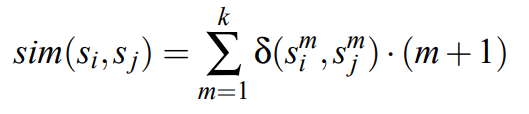

In [147]:
Image.open("image_01.png")

In [324]:
from tqdm.notebook import tqdm

state = list(state)
sim = defaultdict(dict)

def simfcn(a, b):
    m = 1
    ans = 0    
    for i, j in zip(a,b):
        if (i != -1) and (j != -1):
            if i == j:
                ans += m
        m += 1
    return ans

# state간 similarity 구하기

for i in tqdm(range(len(state))):
    for j in range(i+1, len(state)):
        s = simfcn(state[i], state[j])
        if s != 0:
            sim[state[i]][state[j]] = s
            sim[state[j]][state[i]] = s

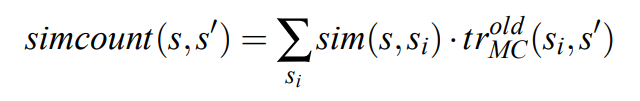

In [148]:
Image.open("image_02.png")

In [325]:
simcount = defaultdict(dict)

def simcountfcn(s,s_p):
    ans = 0
    # s의 자식노드들에 대해서(이것들은 이미 similarity != 0을 만족함.)
    for s_i in sim[s]:
        #s_i로부터 s'으로의 연결 선이 존재한다면
        if s_p in tr_predict[s_i]:
            ans += sim[s][s_i] * tr_predict[s_i][s_p]
    return ans

for i in tqdm(range(len(state))):
    for j in range(i+1, len(state)):
        if (state[i][1:] == state[j][:-1]):
            op = simcountfcn(state[i], state[j])
            if op != 0:
                simcount[state[i]][state[j]] = round(op, 4)
                
simcount

defaultdict(dict,
            {(132, 253, 263): {(253, 263, 295): 0.48,
              (253, 263, 204): 0.76,
              (253, 263, 87): 0.385,
              (253, 263, 8): 1.165,
              (253, 263, 262): 0.68,
              (253, 263, 170): 0.385,
              (253, 263, 145): 0.385,
              (253, 263, 184): 0.385,
              (253, 263, 113): 0.385},
             (113, 303, 272): {(303, 272, 3): 0.725,
              (303, 272, 164): 0.58,
              (303, 272, 78): 0.65,
              (303, 272, 106): 0.58,
              (303, 272, 100): 0.58,
              (303, 272, 187): 0.725,
              (303, 272, 295): 0.58,
              (303, 272, 263): 0.58},
             (279, 303, 263): {(303, 263, 164): 0.395,
              (303, 263, 43): 0.825,
              (303, 263, 374): 0.395,
              (303, 263, 253): 0.45,
              (303, 263, 8): 0.795,
              (303, 263, 262): 0.6,
              (303, 263, 77): 0.395,
              (303, 263, 113): 1.145},


> ## simcount 계산 예제

In [221]:
# 전체 state에서 (-1, -1, 15)와 비슷한 state : similarity
# 얘네(s_i)를 거쳐서 s'으로 가는 길이 있다면 그 transition prob과 similarity를 곱해 더한다. 

# s'은 (47, 15, 76)이고, 개별 s_i들에 대해 ((-1, 47,15), (-1, 72, 15), (72, 71, 15), (72, 39, 15))
# s'으로의 transition probability가 존재하는 지를 check해줘야 함.

s = (-1,-1,15)
s_p = (47, 15, 76)
s_i_lst = [(-1, 47,15), (-1, 72, 15), (72, 71, 15), (72, 39, 15)]

# similarity가 0이 아닌 녀석들에 대해
for i in range(len(s_i_lst)):
    # s_i에서 s'로의 transition probability가 존재한다면,
    if s_p in tr_predict[s_i_lst[i]]:
        print(f"sim(s, s_{i+1}) * tr_pred(s_{i+1}, s') = {sim[s][s_i_lst[i]] * tr_predict[s_i_lst[i]][s_p]}")
        
# 그 값을 모두 더한게 simcount(s,s')이 됨.

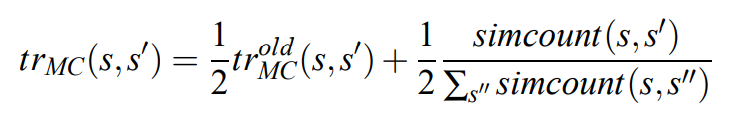

In [149]:
Image.open("image_03.png")

In [326]:
# 꼭 확률의 총 합이 1은 아님
# 따라서 normalize해줄 필요가 있음.

tr_mc = defaultdict(dict)

# tr_mc에 tr_predict 더하기
for i in tr_predict:
    for j in tr_predict[i]:
        if j not in tr_mc[i]:
            tr_mc[i][j] = (tr_predict[i][j]) / 2
        else:
            tr_mc[i][j] += (tr_predict[i][j]) / 2

# tr_mc에 simcount 더하기
for i in simcount:
    simsum = np.sum(list(simcount[i].values()))
    
    for j in simcount[i]:
        if j not in tr_mc[i]:
            tr_mc[i][j] = (simcount[i][j] / simsum) / 2
        else:
            tr_mc[i][j] += (simcount[i][j] / simsum) / 2

# 확률값으로 normalize

for i in tr_mc:
    sss = np.sum(list(tr_mc[i].values()))    
    for j in tr_mc[i]:
        tr_mc[i][j] = round(tr_mc[i][j]/sss, 4)

tr_mc

defaultdict(dict,
            {(-1, -1, 113): {(-1, 113, 187): 1.0},
             (-1, 113, 303): {(113, 303, 210): 0.0787,
              (113, 303, 253): 0.0827,
              (113, 303, 87): 0.0787,
              (113, 303, 262): 0.0797,
              (113, 303, 183): 0.0787,
              (113, 303, 98): 0.0966,
              (113, 303, 187): 0.1116,
              (113, 303, 204): 0.0787,
              (113, 303, 48): 0.0787,
              (113, 303, 272): 0.0787,
              (113, 303, 241): 0.0787,
              (113, 303, 100): 0.0787},
             (-1, -1, 96): {(-1, 96, 149): 0.1469,
              (-1, 96, 98): 0.1189,
              (-1, 96, 218): 0.1469,
              (-1, 96, 48): 0.1469,
              (-1, 96, 287): 0.1469,
              (-1, 96, 375): 0.1469,
              (-1, 96, 253): 0.1469},
             (-1, -1, 98): {(-1, 98, 187): 1.0},
             (-1, 98, 279): {(98, 279, 226): 0.596,
              (98, 279, 69): 0.244,
              (98, 279, 43): 0.16},
    

# 알파 베타 구하기

In [327]:
# 위에서 구한 item2idx를 활용

def itemidxfcn(data):
    lst = []
    for i in tqdm(range(len(data))):
        lst2 = []
        a = data.loc[i,:]
        for v in a[a.isnull() == False].tolist():
            lst2.append(item2idx[v])
        lst.append(list(reversed(lst2)))
    return lst

idxlst = itemidxfcn(data)
idxlst

idxlst = np.array(idxlst)

df = pd.DataFrame(idxlst)
df.head()

,0
0,"[114, 145, 253, 72, 287, 171, 6, 190, 63, 210,..."
1,"[98, 226, 364, 145, 359, 297, 77, 380, 149, 96]"
2,"[69, 226, 279, 98]"
3,"[360, 43, 52, 151, 3, 272, 253, 335, 295, 288,..."
4,"[360, 43, 52, 361, 272, 114, 174, 369, 226, 24..."


In [328]:
# 각각의 item에 대한 prior distribution 구하기
# item r이 구매된 개수 / 전체 아이템 개수

full_item_lst = []

for i in tqdm(range(len(data))):
    full_item_lst += df.iloc[i,:].tolist()[0]

p_r = pd.Series(full_item_lst).value_counts() / np.sum(pd.Series(full_item_lst).value_counts())

# 알파에 쓸 감마 값 정의
gamma = 1/1000

In [117]:
p_r

187    0.046215
262    0.039047
226    0.038170
43     0.034651
279    0.032050
         ...   
314    0.000043
124    0.000043
256    0.000029
186    0.000029
79     0.000029
Length: 400, dtype: float64

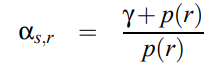

In [38]:
Image.open("image_04.png")

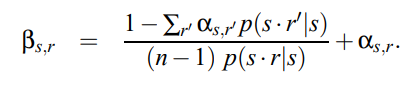

In [39]:
Image.open("image_05.png")

> ### beta값이 negative하면 small positive 값으로 세팅
> ### beta값을 곱한 값들의 합으로 나눠서 확률값으로 만들어야함

In [224]:
# alpha(s,r)

def alpha(r):
    return (gamma + p_r[r])/p_r[r]

def beta(s, s_p, r):
    # s에서 전이 가능한 전체 state의 수 
    n = len(tr_mc[s])
    
    numer = 1
    lst = list(tr_mc[s].values())
    for i in range(n):
        numer -= alpha(r) * lst[i]
    if tr_mc[s][s_p] != 0:
        deno = (n-1) * tr_mc[s][s_p]
        bb = numer / deno + alpha(r)
        if bb < 0:
            return 0.001
        else:
            return bb
    else:
        return 0.001

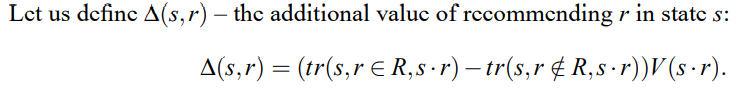

In [100]:
Image.open("image_06.png")

# state value function 초기화하기(optimal action을 구하기 위함)
> policy improvement 단계를 먼저 거친다고 생각하면 됨.

In [329]:
v = defaultdict(float)
for s in state:
    v[s] = 1.0

# policy improvement

> - optimal action(추천 리스트)를 additive value를 이용해 구함

> - 구해진 추천 리스트가 현재 state에서의 action값이 되고 deterministic하게 policy가 됨

In [330]:
# 한번 improve하는 데 20분 정도 걸림

def policy_improvement(v):
    alpha_val = defaultdict(list)
    beta_val = defaultdict(list)
    
    for s in tqdm(tr_predict):
        for r in idx2item:
            s_p = list(s[1:])
            s_p.append(r)
            s_p = tuple(s_p)

            # tr_predict(s,s')이 존재하면 그제서야 alpha * tr(s,s'), beta * tr(s,s')으로 연산이 가능해 짐.
            if s_p in state:
                # s'이 s로부터 발생했던 경우에만 연산이 가능.
                if s_p in tr_mc[s]:
                    add = (alpha(r) * tr_mc[s][s_p]) * v[s_p]
                    beta_val[s].append((s_p, beta(s, s_p, r) * tr_mc[s][s_p] * v[s_p])) 
                    alpha_val[s].append((s_p, round(add, 6)))
    
    return alpha_val, beta_val
    
# recommendation list for each state
a,b = policy_improvement(v)

# 알파

for i in a:
    arr = np.array(a[i])[:,1]
    a[i] = np.array(a[i])
    a[i][:,1] = arr / np.sum(arr)

# 베타 정규화

for i in b:
    arr = np.array(b[i])[:,1]
    b[i] = np.array(b[i])
    
    b[i][:,1] = arr / np.sum(arr)
    
# 이제 이 값(a)을 additive value를 구하기 위한 tr의 차이로 사용, 마이너스 값을 없애려고 +1해줌

for i in a:
    a[i][:,1] = a[i][:,1] - b[i][:,1] + 1

C:\Users\SM129\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


# Optimal recommend set(top-k)

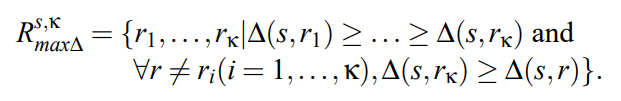

In [3]:
Image.open("image_07.png")

> - 위에서 구한 add_val을 내림차순으로 정렬한다.

> - k번째까지의 상품 r을 추천해준다.

> - 이게 구해지는 순간 특정 state에서의 action이 fix된다.(policy가 결정되었다고 판단)

In [331]:
# top N개의 상품을 추천
# 여기서 top N개를 채우지 못하면?
# 협업필터링 + 잘팔리는 제품으로 채우기!
# 가능한 action들에 대한 정의

k = 12
r_lst = defaultdict(list)

for i in a:
    r_lst[i] = [j[0][-1] for j in sorted(a[i], key = lambda x: -x[1])[:k]]
    
r_lst

defaultdict(list,
            {(-1, -1, 113): [187],
             (-1, 113, 303): [48,
              241,
              183,
              204,
              210,
              87,
              100,
              272,
              253,
              262,
              98,
              187],
             (-1, -1, 96): [375, 48, 218, 287, 149, 98, 253],
             (-1, -1, 98): [187],
             (-1, 98, 279): [69, 43, 226],
             (-1, -1, 100): [132, 3, 226, 263, 187, 262],
             (-1, -1, 328): [240, 364, 253, 396, 272, 43, 52, 226],
             (-1, -1, 138): [98],
             (-1, -1, 43): [262, 187],
             (-1, 43, 187): [162, 52, 31, 253, 272, 262],
             (-1, -1, 26): [295, 303, 253, 226, 263, 279, 187, 98],
             (-1, -1, 10): [26, 279, 187, 226],
             (-1, -1, 253): [187],
             (-1, 98, 263): [65, 55, 273, 383, 369, 187, 303, 279],
             (-1, 113, 187): [162, 272, 26, 31, 253],
             (-1, 253, 272): [48, 11

In [332]:
# 전체 state의 수
print(len(state))

# cover 가능한 state의 수
print(len(r_lst))

2497
640


# state s에서 action R(r1,...,rK)을 실시했을 때 얻게되는 reward 정의

* top k개의 recom list가 구해지면 이미 action이 정해진 것임. 이제 개별 item별로 가지는 reward가 뭐인지에 대한 reward design.
>- 레시피를 만들어? 레시피와의 상호관계, 유통기한, 가격

* 개별 상품 r에 대해 reward를 각기 계산함.
>- 유통기한이나 다른 것들과의 밸런스 정도? + 레시피와의 연계정도? + lift를 기반으로?
>- 추천했을 때(판매를 가정하는 상황) 웹사이트에 오는 이점을 통해 reward를 계산

* 임의의 set R에 존재하는 r에 대해 모두 더함(reward 간의 독립성 가정).
>- 단순하게 더하는 거 말고 다른 방법이 있을까?

* State value function V(s) 구하기
>- value evaluation

In [272]:
# recommended item list l이 주어짐
# l에서 하나씩 아이템을 뽑아와서 그 아이템 하나하나가 가지는 reward를 더해서 총 리워드를 보냄.

# def rwd_fcn(l):
#     rr = 0
#     for i in l:
#         rr += i % 3
#     return rr

rwd_fcn = 10 * np.random.RandomState(2).rand(400)
rwd_fcn

array([4.35994902, 0.25926232, 5.49662478, 4.35322393, 4.20367802,
       3.30334821, 2.04648634, 6.19270966, 2.99654674, 2.66827275,
       6.21133833, 5.29142094, 1.34579945, 5.13578121, 1.84439866,
       7.85335148, 8.53975293, 4.94236837, 8.46561485, 0.79645477,
       5.0524609 , 0.65286504, 4.28122328, 0.96530916, 1.27159972,
       5.96745309, 2.26012001, 1.06945684, 2.20306207, 3.49826285,
       4.67787485, 2.01743226, 6.40406725, 4.83069836, 5.0523672 ,
       3.86892651, 7.93637454, 5.80004179, 1.62298599, 7.00752347,
       9.6455108 , 5.00008361, 8.89520064, 3.41613653, 5.67144128,
       4.27545963, 4.36747263, 7.76559185, 5.35604173, 9.53742227,
       5.4420816 , 0.82094922, 3.66342402, 8.50850504, 4.06275043,
       0.27202366, 2.47177239, 0.67144371, 9.93852011, 9.70580313,
       8.00258351, 6.01817121, 7.6495986 , 1.69225447, 2.93023232,
       5.24066875, 3.56624281, 0.45678965, 9.83153445, 4.41354919,
       5.04000439, 3.23541318, 2.59744753, 3.86889885, 8.32016

# Value function evaluation(policy evaluation) given policy(top-k set)
> - Bellman optimality equation

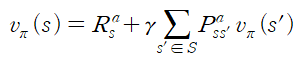

In [4]:
Image.open("image_08.png")

In [333]:
v = defaultdict(float)
for s in state:
    v[s] = 1.0

gam = 0.99

def policy_evaluation(v):
    v_new = defaultdict(float)
    for s in v:
        if len(r_lst[s]) != 0:
            reward = np.sum(rwd_fcn[r_lst[s]]) / len(r_lst[s])
        else:
            reward = 0
        
        # sigma가 1인 이유 : additive value 구할 때 안사라지게 하기 위함.
        sigma = 1

        for s_p in tr_mc[s]:
            sigma += tr_mc[s][s_p] * v[s_p]
        v_new[s] = reward + gam * sigma
    
    return v_new

v = policy_evaluation(v)
v

defaultdict(float,
            {(-1, 189, 7): 0.99,
             (-1, 32, 187): 0.99,
             (132, 253, 263): 6.824379667994644,
             (-1, 52, 187): 7.623099190913795,
             (-1, 219, 43): 0.99,
             (-1, 293, 364): 0.99,
             (-1, -1, 26): 5.520836525818387,
             (31, 187, 26): 0.99,
             (-1, 262, 303): 7.0363013181961565,
             (-1, 228, 31): 0.99,
             (364, 187, 190): 0.99,
             (-1, 110, 253): 0.99,
             (98, 226, 22): 0.99,
             (113, 303, 272): 6.886299868692832,
             (-1, 357, 396): 0.99,
             (-1, -1, 212): 6.296211252986462,
             (-1, 44, 303): 0.99,
             (279, 262, 291): 0.99,
             (-1, 224, 226): 0.99,
             (279, 303, 263): 5.763281449686742,
             (396, 113, 216): 0.99,
             (-1, 55, 52): 0.99,
             (-1, -1, 358): 6.915626345019353,
             (-1, 360, 253): 0.99,
             (43, 303, 63): 0.99,
           

In [334]:
# state i에서 j로 갈 때의 additive value update

for i in a:
    # a[i][j][0]로의 value이기 때문에 v[a[i][j][0]]를 사용
    for j in range(len(a[i])):
        print(a[i][j][1])
        a[i][j][1] = a[i][j][1] * v[a[i][j][0]]
        print(a[i][j][1])
        print()

1.0
4.6886566050818

1.0473876577837016
1.0369137812058646

0.9963011654795828
0.986338153824787

0.9874055226596116
0.9775314674330154

0.9949555510871156
0.9850059955762445

1.0061309619322298
0.9960696523129076

0.9841331812057652
0.9742918493937075

1.0012242889635854
0.9912120460739495

0.9980412596892867
0.9880608470923938

1.0137757921931894
1.0036380342712574

0.9902769208375186
0.9803741516291434

0.9895686427308923
6.4095211781035495

0.9907990554375208
6.822939405360381

1.0480912693659468
1.0376103566722872

0.9664423817003239
0.9567779578833207

0.9710273074951963
0.9613170344202443

0.9988193225403854
0.9888311293149815

0.9581644883546058
0.9485828434710597

0.9868336910334339
0.9769653541230995

1.0706215395101082
1.059915324115007

1.0
7.0721713415585725

1.0037131462253674
6.449511557145666

1.0241817834184368
1.0139399655842525

0.9721050703561958
0.9623840196526338

1.0016777055945956
0.9916609285386496

1.020540444085504
1.0103350396446489

0.9956973825878004
0.985

0.9904135988779571

0.999582223355599
0.989586401122043

0.9766114408497836
0.9668453264412857

0.9723268458205211
3.857184339664125

0.9612134134953833
5.526327694909474

1.0752509184440162
1.064498409259576

1.1059783408486226
1.0949185574401363

0.9590910472464111
3.8515285214590915

0.9764814514436775
6.621057028360669

0.9789795131873195
0.9691897180554463

0.9940670286642649
0.9841263583776222

0.9570133164078951
0.9474431832438162

1.1145261621573097
1.1033809005357367

0.9759134975947806
0.9661543626188328

1.002115419357579
0.9920942651640031

0.9504316044824355
0.9409272884376111

1.038473768078549
1.0280890303977634

0.9520840538297735
0.9425632132914757

1.1616160809953677
1.149999920185414

0.9669348284306931
0.9572654801463861

1.0496865984210109
1.0391897324368007

0.9462202907840861
0.9367580878762453

0.9672154962823692
0.9575433413195455

0.9594228892733234
0.9498286603805902

0.9825223262825106
0.9726971030196855

0.9758236676223166
0.9660654309460934

0.980146023958

0.9296416529044983

1.0450205985887302
1.034570392602843

0.978896990305797
0.969108020402739

1.0161517064695118
1.0059901894048167

1.0208987320051546
1.010689744685103

1.1919105320173529
1.1799914266971794

0.9290857846886516
0.919794926841765

0.8790036832939956
0.8702136464610556

0.9948131044657631
3.7718361677692185

0.9166739977207372
5.504748131775892

1.0885128978134997
1.0776277688353646

0.9281480541769027
0.9188665736351337

0.981518386920265
0.9717032030510624

0.8830468147522144
0.8742163466046922

1.1965428101433093
1.1845773820418761

0.9653785711252945
7.505219816638279

1.045365362882014
1.0349117092531939

0.9281480541769027
0.9188665736351337

0.981518386920265
0.9717032030510624

0.8830468147522144
0.8742163466046922

1.1965428101433093
1.1845773820418761

0.9653785711252945
7.505219816638279

1.045365362882014
1.0349117092531939

1.132655635060883
1.121329078710274

0.8631648947299567
0.8545332457826571

0.899703430160395
0.8907063958587911

1.2353738468548494
1

In [335]:
k = 12
r_lst2 = defaultdict(list)

for i in a:
    r_lst2[i] = [j[0][-1] for j in sorted(a[i], key = lambda x: -x[1])[:k]]
    
r_lst2

defaultdict(list,
            {(-1, -1, 113): [187],
             (-1, 113, 303): [272,
              262,
              48,
              241,
              183,
              204,
              210,
              87,
              100,
              253,
              98,
              187],
             (-1, -1, 96): [375, 48, 218, 287, 149, 98, 253],
             (-1, -1, 98): [187],
             (-1, 98, 279): [43, 69, 226],
             (-1, -1, 100): [132, 3, 226, 263, 187, 262],
             (-1, -1, 328): [240, 364, 253, 396, 272, 43, 52, 226],
             (-1, -1, 138): [98],
             (-1, -1, 43): [262, 187],
             (-1, 43, 187): [272, 31, 262, 162, 52, 253],
             (-1, -1, 26): [295, 303, 253, 226, 263, 279, 187, 98],
             (-1, -1, 10): [26, 279, 187, 226],
             (-1, -1, 253): [187],
             (-1, 98, 263): [279, 303, 65, 55, 273, 383, 369, 187],
             (-1, 113, 187): [31, 253, 162, 272, 26],
             (-1, 253, 272): [98, 11

In [336]:
# 달라진 거 찾기
cnt = 0

dif = []

for i in r_lst:
    if r_lst[i] != r_lst2[i]:
        dif.append(i)
        cnt += 1
        if cnt == 10:
            break

In [357]:
print(r_lst[dif[0]])
print(r_lst2[dif[0]])

[48, 241, 183, 204, 210, 87, 100, 272, 253, 262, 98, 187]
[272, 262, 48, 241, 183, 204, 210, 87, 100, 253, 98, 187]


In [354]:
# 당장 보면 state dif[0]에서 전이가능한 state들에서 272는 현재 당장의 reward는 매우 낮지만(1.8정도, 나머지 애들애 비해)
# value evaluation을 하고 난 뒤 가장 높은 순위로 추천되고 있음을 확인 할 수 있다.

{i:j for i, j in zip(r_lst[dif[0]], rwd_fcn[r_lst[dif[0]]])}

{48: 5.356041734976563,
 241: 1.783098277777202,
 183: 8.57839518439514,
 204: 4.178362440027158,
 210: 9.411158736336223,
 87: 5.509779053244193,
 100: 7.780081598084683,
 272: 1.8115022940864645,
 253: 1.2578138255308757,
 262: 7.157305877709652,
 98: 1.704771334837707,
 187: 7.1574708428635425}

In [355]:
a[dif[0]]

array([[(113, 303, 48), 1.0369137812058646],
       [(113, 303, 87), 0.986338153824787],
       [(113, 303, 98), 0.9775314674330154],
       [(113, 303, 100), 0.9850059955762445],
       [(113, 303, 183), 0.9960696523129076],
       [(113, 303, 187), 0.9742918493937075],
       [(113, 303, 204), 0.9912120460739495],
       [(113, 303, 210), 0.9880608470923938],
       [(113, 303, 241), 1.0036380342712574],
       [(113, 303, 253), 0.9803741516291434],
       [(113, 303, 262), 6.4095211781035495],
       [(113, 303, 272), 6.822939405360381]], dtype=object)